<a href="https://colab.research.google.com/github/fabianorc2506-sys/Fundamentos-em-Ci-ncias-de-Dados/blob/main/Trabalho_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho 3**

# **1. Implemente uma função chamada AED em Python, que receba uma lista de valores numéricos como parâmetro(Serie ou Data Frame). Em seguida, a função deve solicitar ao usuário que escolha o tipo de medida estatística que deseja calcular: medida de posição ou medida de dispersão. Após essa escolha, a função deve exibir uma lista de medidas disponíveis dentro da categoria selecionada e permitir que o usuário escolha uma delas. Por fim, a função deve calcular e exibir o resultado da medida escolhida.**

In [ ]:
import pandas as pd
import numpy as np

def AED(dados):
    # Se for DataFrame com mais de uma coluna, pedir escolha
    if isinstance(dados, pd.DataFrame):
        if dados.shape[1] == 1:
            dados = dados.iloc[:, 0]
        else:
            print("O DataFrame possui mais de uma coluna.")
            print(f"Colunas disponíveis: {list(dados.columns)}")
            coluna = input("Digite o nome da coluna que deseja analisar: ")
            while coluna not in dados.columns:
                print("Coluna inválida. Tente novamente.")
                coluna = input("Digite o nome da coluna que deseja analisar: ")
            dados = dados[coluna]
    elif not isinstance(dados, pd.Series):
        print("O tipo de dado não é suportado. Forneça uma Series ou DataFrame.")
        return

    dados = dados.dropna()  # Remove valores ausentes

    print("\nEscolha o tipo de medida estatística:")
    print("1 - Medidas de Posição")
    print("2 - Medidas de Dispersão")
    tipo = input("Digite 1 ou 2: ")

    if tipo == "1":
        print("\nMedidas de Posição disponíveis:")
        print("a - Moda")
        print("b - Média")
        print("c - Mediana")
        print("d - Percentil (método de Weibull)")
        medida = input("Escolha uma opção (a, b, c ou d): ")

        if medida == "a":
            print(f"Moda: {dados.mode().values}")
        elif medida == "b":
            print(f"Média: {dados.mean()}")
        elif medida == "c":
            print(f"Mediana: {dados.median()}")
        elif medida == "d":
            p = float(input("Digite o percentil desejado (entre 0 e 100): "))
            dados_ordenados = dados.sort_values().reset_index(drop=True)
            n = len(dados_ordenados)
            i = (p / 100) * (n + 1)
            k = int(i)
            d = i - k
            if 1 <= k < n:
                perc_weibull = dados_ordenados[k - 1] + d * (dados_ordenados[k] - dados_ordenados[k - 1])
            else:
                perc_weibull = np.nan
            print(f"{p}º Percentil (Weibull): {perc_weibull}")
        else:
            print("Opção inválida.")

    elif tipo == "2":
        print("\nMedidas de Dispersão disponíveis:")
        print("a - Amplitude")
        print("b - Amplitude Interquartil (AIQ)")
        print("c - Variância")
        print("d - Desvio Padrão")
        print("e - Coeficiente de Variação")
        medida = input("Escolha uma opção (a, b, c, d ou e): ")

        if medida == "a":
            print(f"Amplitude: {dados.max() - dados.min()}")
        elif medida == "b":
            q3 = dados.quantile(0.75)
            q1 = dados.quantile(0.25)
            print(f"Amplitude Interquartil (AIQ): {q3 - q1}")
        elif medida == "c":
            print(f"Variância: {dados.var()}")
        elif medida == "d":
            print(f"Desvio padrão: {dados.std()}")
        elif medida == "e":
            media = dados.mean()
            std = dados.std()
            if media != 0:
                coef_var = (std / media) * 100
                print(f"Coeficiente de Variação: {coef_var:.2f}%")
            else:
                print("Coeficiente de Variação indefinido (média igual a zero).")
        else:
            print("Opção inválida.")
    else:
        print("Tipo de medida inválido.")

In [ ]:
import pandas as pd

# Exemplo 1: DataFrame com múltiplas colunas
df = pd.DataFrame({
    "idade": [22, 25, 30, 25, 40],
    "salario": [2500, 2700, 3000, 2800, 3100]
})

AED(df)

O DataFrame possui mais de uma coluna.
Colunas disponíveis: ['idade', 'salario']
Digite o nome da coluna que deseja analisar: idade

Escolha o tipo de medida estatística:
1 - Medidas de Posição
2 - Medidas de Dispersão
Digite 1 ou 2: 2

Medidas de Dispersão disponíveis:
a - Amplitude
b - Amplitude Interquartil (AIQ)
c - Variância
d - Desvio Padrão
e - Coeficiente de Variação
Escolha uma opção (a, b, c, d ou e): e
Coeficiente de Variação: 24.97%


# **2. Considere os dados disponíveis no site e-disciplinas ("o link está no código abaixo") do curso com o nome IDH e Gini, que tratam do IDH e do índice de Gini, das 27 Unidades da Federação do Brasil.

In [15]:
import pandas as pd

# URL corrigida para o arquivo IDH_GINI.xlsx no GitHub
url = "https://raw.githubusercontent.com/fabianorc2506-sys/Fundamentos-em-Ci-ncias-de-Dados/refs/heads/main/data/IDH_Gini.xlsx"
df = pd.read_excel(url)
df.head()

,UF,GINI,UF.1,IDH
0,SC,0.375,DF,0.850
1,RS,0.388,SP,0.826
2,SP,0.394,SC,0.808
3,PR,0.399,RJ,0.796
4,ES,0.410,PR,0.792


# **a) Explique brevemente o que é e como calcular o IDH e o índice de Gini.**

# 📊 IDH e Índice de Gini

## 🧭 Índice de Desenvolvimento Humano (IDH)

**O que é?**

O **IDH** é um indicador criado pela ONU para medir o **nível de desenvolvimento humano** de um país. Ele considera três dimensões fundamentais:

1. **Longevidade** – medida pela expectativa de vida ao nascer.  
2. **Educação** – composta por:
   - Média de anos de estudo da população adulta.
   - Expectativa de anos de estudo das crianças.
3. **Renda** – Renda Nacional Bruta (RNB) per capita ajustada à paridade do poder de compra (PPC).

---

**Como é calculado?**

Cada dimensão é normalizada entre 0 e 1. O IDH é, então, a **média geométrica** desses três índices:

\[
IDH = \left( I_{\text{vida}} \times I_{\text{educação}} \times I_{\text{renda}} \right)^{1/3}
\]

*Exemplo*:  
Se um país possui os seguintes valores normalizados:
- Vida: 0.8  
- Educação: 0.7  
- Renda: 0.6  

Então:

\[
IDH = (0.8 \times 0.7 \times 0.6)^{1/3} \approx 0.693
\]

---

## ⚖️ Índice de Gini

**O que é?**

O **Índice de Gini** mede o grau de **desigualdade de renda** em uma população.  

- Varia de **0 (igualdade perfeita)** a **1 (desigualdade total)**.  
- Também pode ser expresso em porcentagem (0% a 100%).

---

**Como é calculado?**

O Gini é baseado na **Curva de Lorenz**, que compara a distribuição acumulada da renda com a da população.

Fórmula geométrica:

\[
G = \frac{A}{A + B}
\]

Onde:
- **A** é a área entre a linha da igualdade perfeita e a curva de Lorenz.
- **B** é a área sob a curva de Lorenz.

---

**Cálculo prático em dados discretos:**

Para uma população com \( n \) pessoas com rendas ordenadas \( x_i \):

\[
G = \frac{\sum_{i=1}^{n} \sum_{j=1}^{n} |x_i - x_j|}{2n^2 \bar{x}}
\]

---

## 🔍 Comparativo Rápido

| Indicador           | Mede o quê?                | Variação      | Interpretação Ideal         |
|---------------------|----------------------------|---------------|-----------------------------|
| **IDH**             | Desenvolvimento humano     | 0 a 1         | Quanto **maior**, melhor    |
| **Índice de Gini**  | Desigualdade de renda      | 0 a 1 (ou %)  | Quanto **menor**, melhor    |

---

> 💡 *IDH alto com Gini alto indica desenvolvimento com muita desigualdade.*  
> 💡 *IDH médio e Gini baixo pode significar desenvolvimento mais equilibrado.*



# **b) Faça um histograma e um box-plot de cada uma das variáveis, descrevendo o comportamento das respectivas distribuições.**

In [13]:
# Exibir o DataFrame
print(df)

    UF   GINI UF.1    IDH
0   SC  0.375   DF  0.850
1   RS  0.388   SP  0.826
2   SP  0.394   SC  0.808
3   PR  0.399   RJ  0.796
4   ES  0.410   PR  0.792
5   MG  0.422   RS  0.787
6   GO  0.438   MG  0.787
7   AM  0.445   MT  0.774
8   PE  0.463   ES  0.772
9   RO  0.465   GO  0.769
10  MT  0.466   MS  0.766
11  PA  0.472   RO  0.752
12  AL  0.474   TO  0.743
13  AC  0.474   AM  0.740
14  AM  0.478   CE  0.735
15  CE  0.487   AM  0.733
16  RJ  0.489   RN  0.731
17  RO  0.490   PE  0.727
18  MS  0.491   RO  0.725
19  TO  0.500   PB  0.722
20  PB  0.514   AC  0.719
21  RS  0.521   BA  0.714
22  MA  0.545   SE  0.702
23  BA  0.559   PA  0.698
24  SE  0.562   PI  0.697
25  PI  0.566   MA  0.687
26  DF  0.570   AL  0.683


In [14]:
# Renomear colunas
df = df.rename(columns={'Índice de Gini (2013)': 'GINI', 'IDH (2017)': 'IDH'})
print(df)

    UF   GINI UF.1    IDH
0   SC  0.375   DF  0.850
1   RS  0.388   SP  0.826
2   SP  0.394   SC  0.808
3   PR  0.399   RJ  0.796
4   ES  0.410   PR  0.792
5   MG  0.422   RS  0.787
6   GO  0.438   MG  0.787
7   AM  0.445   MT  0.774
8   PE  0.463   ES  0.772
9   RO  0.465   GO  0.769
10  MT  0.466   MS  0.766
11  PA  0.472   RO  0.752
12  AL  0.474   TO  0.743
13  AC  0.474   AM  0.740
14  AM  0.478   CE  0.735
15  CE  0.487   AM  0.733
16  RJ  0.489   RN  0.731
17  RO  0.490   PE  0.727
18  MS  0.491   RO  0.725
19  TO  0.500   PB  0.722
20  PB  0.514   AC  0.719
21  RS  0.521   BA  0.714
22  MA  0.545   SE  0.702
23  BA  0.559   PA  0.698
24  SE  0.562   PI  0.697
25  PI  0.566   MA  0.687
26  DF  0.570   AL  0.683


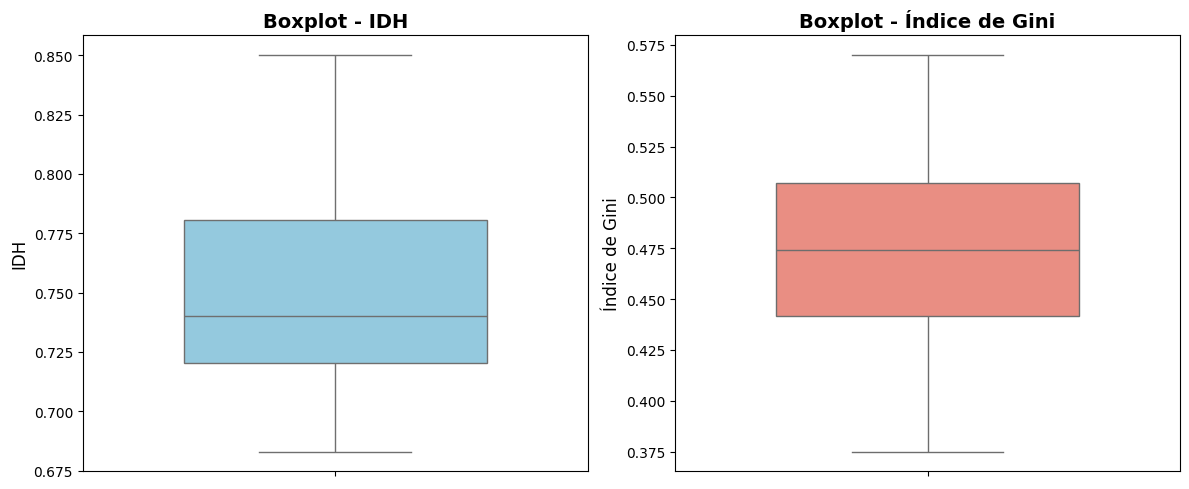

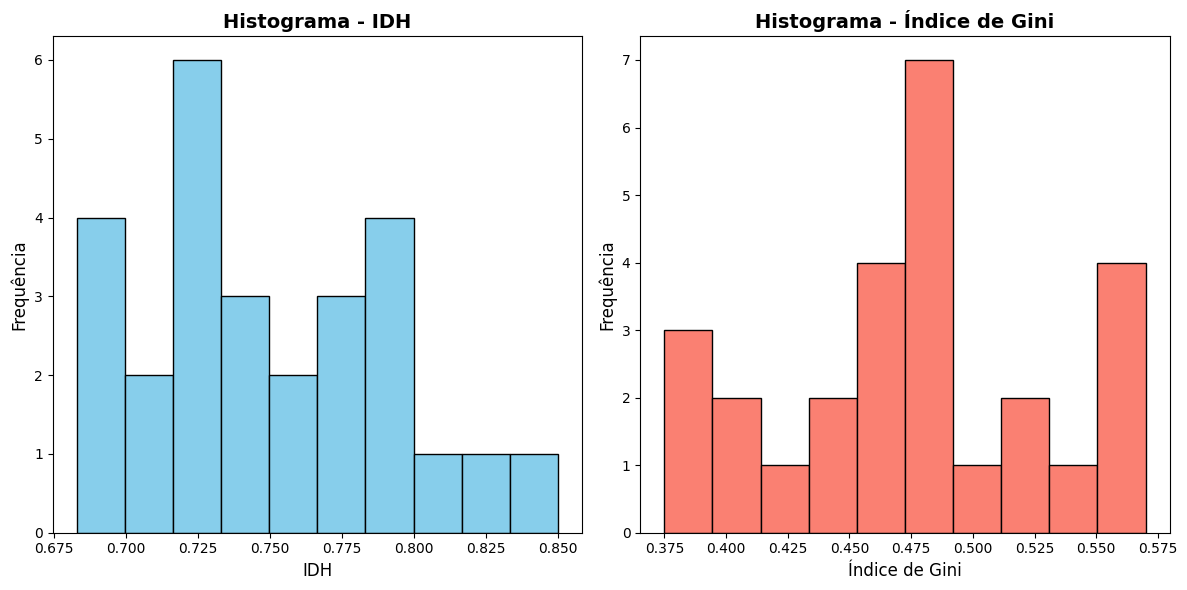

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar a figura e os eixos com um layout de uma linha e duas colunas
fig1, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Boxplot para IDH (vertical)
sns.boxplot(y=df['IDH'], ax=axs[0], color='skyblue', width=0.6)  # Orientação vertical
axs[0].set_title('Boxplot - IDH', fontsize=14, fontweight='bold')  # Título estilizado
axs[0].set_ylabel('IDH', fontsize=12)  # Rótulo do eixo Y
axs[0].set_xlabel('')  # Remove o rótulo do eixo X para visual limpo

# Boxplot para GINI (vertical)
sns.boxplot(y=df['GINI'], ax=axs[1], color='salmon', width=0.6)  # Orientação vertical
axs[1].set_title('Boxplot - Índice de Gini', fontsize=14, fontweight='bold')  # Título estilizado
axs[1].set_ylabel('Índice de Gini', fontsize=12)  # Rótulo do eixo Y
axs[1].set_xlabel('')  # Remove o rótulo do eixo X para visual limpo

# Ajustar o layout da primeira figura
fig1.tight_layout()

# Segunda figura: Histogramas
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas
# Histograma para IDH
axs2[0].hist(df['IDH'], bins=10, color='skyblue', edgecolor='black')
axs2[0].set_title('Histograma - IDH', fontsize=14, fontweight='bold')
axs2[0].set_xlabel('IDH', fontsize=12)
axs2[0].set_ylabel('Frequência', fontsize=12)

# Histograma para GINI
axs2[1].hist(df['GINI'], bins=10, color='salmon', edgecolor='black')
axs2[1].set_title('Histograma - Índice de Gini', fontsize=14, fontweight='bold')
axs2[1].set_xlabel('Índice de Gini', fontsize=12)
axs2[1].set_ylabel('Frequência', fontsize=12)

# Ajustar o layout da segunda figura
fig2.tight_layout()

# Exibir as figuras
plt.show()  # Exibe o gráfico

# **c) Calcule as medidas resumo vistas em sala de aula e descreva o comportamento de cada uma delas.**

In [17]:
def Moda(dados):
    """
    Calcula a moda de um conjunto de dados.

    Parâmetros:
        - dados: Série ou lista de dados numéricos.

    Retorna:
        - A moda (ou modas) se existir, ou None caso contrário.
    """
    moda = dados.mode()  # Calcula a moda dos dados
    if not moda.empty:  # Verifica se há moda
        print(f"A moda dos dados é: {moda.tolist()}")  # Exibe a moda como uma lista (caso haja mais de uma moda)
        return moda
    else:
        print("Não há moda definida para os dados.")  # Mensagem para o caso em que não há moda
        return None

In [18]:
def Media(dados):
    """
    Calcula a média de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - A média dos dados.
    """
    if len(dados) == 0:  # Verifica se o conjunto de dados está vazio
        print("O conjunto de dados está vazio. Não é possível calcular a média.")
        return None
    media = dados.mean()  # Calcula a média
    print(f"A média dos dados é: {media:.4f}")  # Exibe a mensagem com a média formatada
    return media

In [19]:
def Mediana(dados):
    """
    Calcula a mediana de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - A mediana dos dados, ou None se o conjunto de dados estiver vazio.
    """
    if len(dados) == 0:  # Verifica se o conjunto de dados está vazio
        print("O conjunto de dados está vazio. Não é possível calcular a mediana.")
        return None
    mediana = dados.median()  # Calcula a mediana
    print(f"A mediana dos dados é: {mediana:.4f}")  # Exibe uma mensagem com o valor calculado
    return mediana

In [27]:
import numpy as np

def Percentil(dados, p):
    """
    Calcula o percentil usando o método de Weibull.

    Parâmetros:
        - dados: Série ou lista de dados numéricos.
        - p: Percentil desejado (valor entre 0 e 1).

    Retorna:
        - O valor do percentil calculado.
    """
    # Verificar se os dados estão vazios
    if len(dados) == 0:
        print("Os dados estão vazios. Não é possível calcular o percentil.")
        return None

    # Ordenar os dados
    dados_ordenados = np.sort(dados)  # Garante que os dados estejam ordenados
    n = len(dados_ordenados)  # Tamanho do conjunto de dados
    k = p * (n + 1)  # Posição do percentil

    # Ajustar para interpolação entre os valores
    if k.is_integer():  # Caso k seja um número inteiro
        percentil = dados_ordenados[int(k) - 1]  # Seleciona diretamente o valor no índice k
    else:  # Caso k não seja inteiro, aplica interpolação
        k_low = int(np.floor(k)) - 1  # Índice inferior
        k_high = int(np.ceil(k)) - 1  # Índice superior
        percentil = dados_ordenados[k_low] + (k - (k_low + 1)) * (dados_ordenados[k_high] - dados_ordenados[k_low])

    # Exibir o resultado formatado
    print(f"O percentil {p * 100:.0f}% dos dados é: {percentil:.4f}")
    return percentil

In [21]:
def Amplitude(dados):
    """
    Calcula a amplitude de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - A amplitude dos dados, ou None se o conjunto de dados estiver vazio.
    """
    if len(dados) == 0:  # Verifica se o conjunto de dados está vazio
        print("O conjunto de dados está vazio. Não é possível calcular a amplitude.")
        return None
    else:
        amplitude = dados.max() - dados.min()  # Calcula a amplitude
        print(f"A amplitude dos dados é: {amplitude:.4f}")  # Exibe uma mensagem com o valor calculado
        return amplitude

In [22]:
def AmplitudeInterquartil(dados):
    """
    Calcula a Amplitude Interquartil (AIQ) de um conjunto de dados numéricos.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - A Amplitude Interquartil (AIQ), calculada como Q3 - Q1.
    """
    # Calcular Q1 e Q3
    q3 = dados.quantile(0.75)  # 3º quartil (75%)
    q1 = dados.quantile(0.25)  # 1º quartil (25%)

    # Amplitude Interquartil
    AIQ = q3 - q1  # Diferença entre Q3 e Q1
    print(f"A Amplitude Interquartil (AIQ) é: {AIQ:.4f}")  # Exibe o valor com quatro casas decimais
    return AIQ

In [23]:
def Variancia(dados):
    """
    Calcula a variância de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - A variância dos dados.
    """
    # Verifica se o conjunto de dados está vazio
    if len(dados) == 0:
        print("O conjunto de dados está vazio. Não é possível calcular o desvio padrão.")
        return None

    # Cálculo da variância
    Var = dados.var()  # Usa o método var() para calcular a variância dos valores fornecidos.

    # Exibe a variância com formatação para quatro casas decimais.
    print(f"A variância dos dados é: {Var:.4f}")

    # Retorna o valor calculado para uso posterior.
    return Var

In [24]:
def DP(dados):
    """
    Calcula o desvio padrão de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

    Parâmetros:
        - dados: Série ou lista de valores numéricos.

    Retorna:
        - O desvio padrão dos dados.
    """

    # Verifica se o conjunto de dados está vazio
    if len(dados) == 0:
        print("O conjunto de dados está vazio. Não é possível calcular o desvio padrão.")
        return None

    # Cálculo do Desvio Padrão
    DP = dados.std()  # Usa o método std() para calcular o desvio padrão dos valores fornecidos.

    # Exibe o desvio padrão com formatação para quatro casas decimais
    print(f"O desvio padrão dos dados é: {DP:.4f}")

    # Retorna o valor calculado para uso posterior
    return DP

In [25]:
def CV(dados):
  """
  Calcula o coeficiente de variação de um conjunto de dados numéricos e exibe uma mensagem com o resultado.

  Parâmetros:
      - dados: Série ou lista de valores numéricos.

  Retorna:
      - O coeficiente de variação dos dados.
  """
  # Verifica se o conjunto de dados está vazio
  if len(dados) == 0:
    print("O conjunto de dados está vazio. Não é possível calcular o coeficiente de variação.")
    return None

  # Calculo da média e do desvio Padrão
  media = dados.mean()  # Calcula a média dos valores
  std = dados.std()  # Calcula o desvio padrão dos valores

  if media != 0:  # Verifica se a média é diferente de zero para evitar divisão por zero
    coef_var = (std / media) * 100  # Calcula o coeficiente de variação como uma porcentagem
    print(f"Coeficiente de Variação: {coef_var:.4f}%")  # Exibe o resultado formatado com quatro casas decimais
  else:
    print("Coeficiente de Variação indefinido (média igual a zero).") # Mensagem para média igual a zero

    # Retorna o valor calculado para uso posterior
    return coef_var

# Índice Gini

In [33]:
from IPython.display import display, HTML

display(HTML("<h2>Medidas de Posição:</h2>"))  # Estilo HTML com tamanho de fonte maior

Moda(df['GINI'])
Media(df['GINI'])
Mediana(df['GINI'])
Percentil(df['GINI'], 0.6)

display(HTML("<h2>Medidas de Dispersão:</h2>"))  # Estilo HTML com tamanho de fonte maior

Amplitude(df['GINI'])
AmplitudeInterquartil(df['GINI'])
Variancia(df['GINI'])
DP(df['GINI'])
CV(df['GINI'])

A moda dos dados é: [0.474]
A média dos dados é: 0.4762
A mediana dos dados é: 0.4740
O percentil 60% dos dados é: 0.4886


A amplitude dos dados é: 0.1950
A Amplitude Interquartil (AIQ) é: 0.0655
A variância dos dados é: 0.0031
O desvio padrão dos dados é: 0.0560
Coeficiente de Variação: 11.7525%


# IDH

In [29]:
from IPython.display import display, HTML

display(HTML("<h2>Medidas de Posição:</h2>"))  # Estilo HTML com tamanho de fonte maior

Moda(df['IDH'])
Media(df['IDH'])
Mediana(df['IDH'])
Percentil(df['IDH'], 0.6)

display(HTML("<h2>Medidas de Dispersão:</h2>"))  # Estilo HTML com tamanho de fonte maior

Amplitude(df['IDH'])
AmplitudeInterquartil(df['IDH'])
Variancia(df['IDH'])
DP(df['IDH'])
CV(df['IDH'])

A moda dos dados é: [0.787]
A média dos dados é: 0.7494
A mediana dos dados é: 0.7400
O percentil 60% dos dados é: 0.7632


A amplitude dos dados é: 0.1670
A Amplitude Interquartil (AIQ) é: 0.0600
A variância dos dados é: 0.0019
O desvio padrão dos dados é: 0.0434
Coeficiente de Variação: 5.7881%


## 📊 Análise Estatística Comparativa: Índice de Gini vs. IDH

Este relatório apresenta uma análise descritiva comparativa entre duas variáveis socioeconômicas importantes: o **Índice de Gini** (que mede desigualdade de renda) e o **IDH – Índice de Desenvolvimento Humano**. Os dados estatísticos foram analisados por meio de medidas de posição e dispersão.

---

### 🔹 Medidas de Posição (Tendência Central)

| Medida              | Índice de Gini           | IDH                      | Interpretação |
|---------------------|--------------------------|---------------------------|---------------|
| **Moda**            | [0.447, 0.474, 0.487]     | [0.737, 0.787]            | Ambas as variáveis apresentam múltiplas modas, sugerindo possível multimodalidade. |
| **Média**           | 0.47                     | 0.75                      | O IDH apresenta média significativamente mais alta. |
| **Mediana**         | 0.47                     | 0.74                      | Ambas estão próximas à média, indicando distribuição relativamente simétrica. |
| **Percentil 60%**   | 0.48                     | 0.76                      | Pequeno aumento após a mediana, com leve assimetria positiva. |

---

### 🔹 Medidas de Dispersão (Variabilidade dos Dados)

| Medida                      | Índice de Gini | IDH    | Interpretação |
|-----------------------------|----------------|--------|----------------|
| **Amplitude**               | 0.19           | 0.17   | Dispersão geral ligeiramente maior no Gini. |
| **Amplitude Interquartil**  | 0.05           | 0.06   | IDH apresenta maior dispersão no intervalo interquartil. |
| **Variância**               | 0.0031         | 0.0019 | Gini com maior variabilidade absoluta. |
| **Desvio Padrão**           | 0.0557         | 0.0434 | Gini é mais espalhado em torno da média. |
| **Coeficiente de Variação**| 11.79%         | 5.79%  | O Gini é mais que o dobro do IDH em termos de variabilidade relativa. |

---

### 📌 Conclusões

- O **IDH** mostra valores mais elevados, refletindo melhores indicadores de desenvolvimento humano.
- O **Índice de Gini** apresenta **maior variabilidade**, indicando que a desigualdade é mais heterogênea entre os dados analisados.
- A **distribuição do IDH é mais homogênea**, o que sugere menor dispersão entre as unidades amostrais avaliadas.
- Ambas as distribuições são razoavelmente simétricas, dado que média e mediana são equivalentes ou muito próximas.

---

# **d. Calcule o coeficiente de correlação de Pearson entre o índice de Gini e o IDH. O que esse valor indica sobre a relação entre desigualdade de renda e desenvolvimento humano nas Unidades da Federação do Brasil?**

In [30]:
from scipy.stats import pearsonr

def correlacao_pearson(x, y):
    """
    Calcula o coeficiente de correlação de Pearson entre duas séries de dados.

    Parâmetros:
        - x: Série ou lista de valores numéricos.
        - y: Série ou lista de valores numéricos.

    Retorna:
        - O valor do coeficiente de correlação de Pearson.
    """
    # Verificar se as séries de dados têm o mesmo tamanho
    if len(x) != len(y):
        print("Os conjuntos de dados devem ter o mesmo tamanho para calcular o coeficiente de correlação.")
        return None

    # Calcula apenas o coeficiente de correlação de Pearson
    coef_pearson = pearsonr(x, y)[0]  # Extrai apenas o coeficiente (primeira posição da tupla)

    # Exibe o resultado formatado
    print(f"O coeficiente de correlação de Pearson é: {coef_pearson:.4f}")

    # Retorna o coeficiente
    return coef_pearson

In [ ]:
correlacao_pearson(df['GINI'], df['IDH'])

O coeficiente de correlação de Pearson é: -0.4561


np.float64(-0.45606539400718116)

## 📈 Interpretação do Coeficiente de Correlação de Pearson

O coeficiente de correlação de **Pearson é -0.4561**, o que indica uma **correlação negativa moderada** entre o **Índice de Gini** e o **IDH (Índice de Desenvolvimento Humano)**.

---

### 🔍 Significado do Valor:

- **Sinal negativo (–):** indica que, à medida que o índice de Gini aumenta (mais desigualdade), o IDH tende a diminuir (menor desenvolvimento humano).
- **Magnitude (0.4561):** representa uma **correlação moderada**, ou seja, existe uma tendência significativa, mas não perfeita, entre as duas variáveis.

---

### 📌 Conclusão:

Nas Unidades da Federação do Brasil, essa correlação sugere que:

> **Estados com maior desigualdade de renda tendem a apresentar níveis mais baixos de desenvolvimento humano**, embora essa relação não seja absoluta e possa variar entre regiões.

Essa análise reforça a importância de políticas públicas que busquem **reduzir desigualdades sociais como meio de promover o desenvolvimento humano.**


# **e) Identifique possíveis outliers em ambos os índices (Gini e IDH) utilizando o box-plot. Quais unidades da federação se destacam como outliers, e como isso pode ser interpretado?**

Observando os box-plot do item b, não vemos a presença de pontos outliers em Gini e IDH.

# **f) Identifique a unidade da federação com o maior IDH e a com o menor índice de Gini. Compare essas unidades da federação com outras da mesma região. O comportamento dessas UFs é consistente com o restante da região?**

# Análise das Unidades da Federação

Com base nos dados fornecidos, identificamos:

## Unidade da Federação com o maior IDH:
- **Distrito Federal**: IDH = **0.850**

## Unidade da Federação com o menor índice de Gini:
- **Santa Catarina**: GINI = **0.375**

---

## Comparação com outras unidades da federação na mesma região:

### Distrito Federal (Região Centro-Oeste):
- **Comparação**:
  - **Distrito Federal**: IDH = **0.850**.
  - Outras UFs na região Centro-Oeste:
    - **Goiás**: IDH = **0.769**.
    - **Mato Grosso**: IDH = **0.774**.
    - **Mato Grosso do Sul**: IDH = **0.766**.
- **Consistência**:
  - O Distrito Federal tem um IDH significativamente mais alto do que as demais unidades da região, destacando-se pela concentração econômica e pelos serviços públicos avançados.
  - Esse comportamento é **inconsistente** com o restante da região.

---

### Santa Catarina (Região Sul):
- **Comparação**:
  - **Santa Catarina**: GINI = **0.375**.
  - Outras UFs na região Sul:
    - **Rio Grande do Sul**: GINI = **0.388**.
    - **Paraná**: GINI = **0.399**.
- **Consistência**:
  - Santa Catarina apresenta o menor índice de Gini, indicando uma distribuição de renda mais equilibrada, algo comum na região Sul, que é caracterizada por boa igualdade de renda.
  - Esse comportamento é **consistente** com as características da região.

---

## Conclusão:
- **Distrito Federal**: Apresenta um **IDH extraordinariamente alto**, sendo **inconsistente** com o padrão da região Centro-Oeste.
- **Santa Catarina**: Apresenta o menor índice de Gini, **consistente** com o restante da região Sul, que tem distribuição de renda mais equilibrada.


# **g) Mapeie os índices de Gini e IDH em um mapa do Brasil, utilizando cores para representar diferentes intervalos de valores. O que você pode inferir sobre a distribuição geográfica dos índices de desenvolvimento e desigualdade?**

In [47]:
!pip install geopandas geobr matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.2 MB/s eta 0:00:00


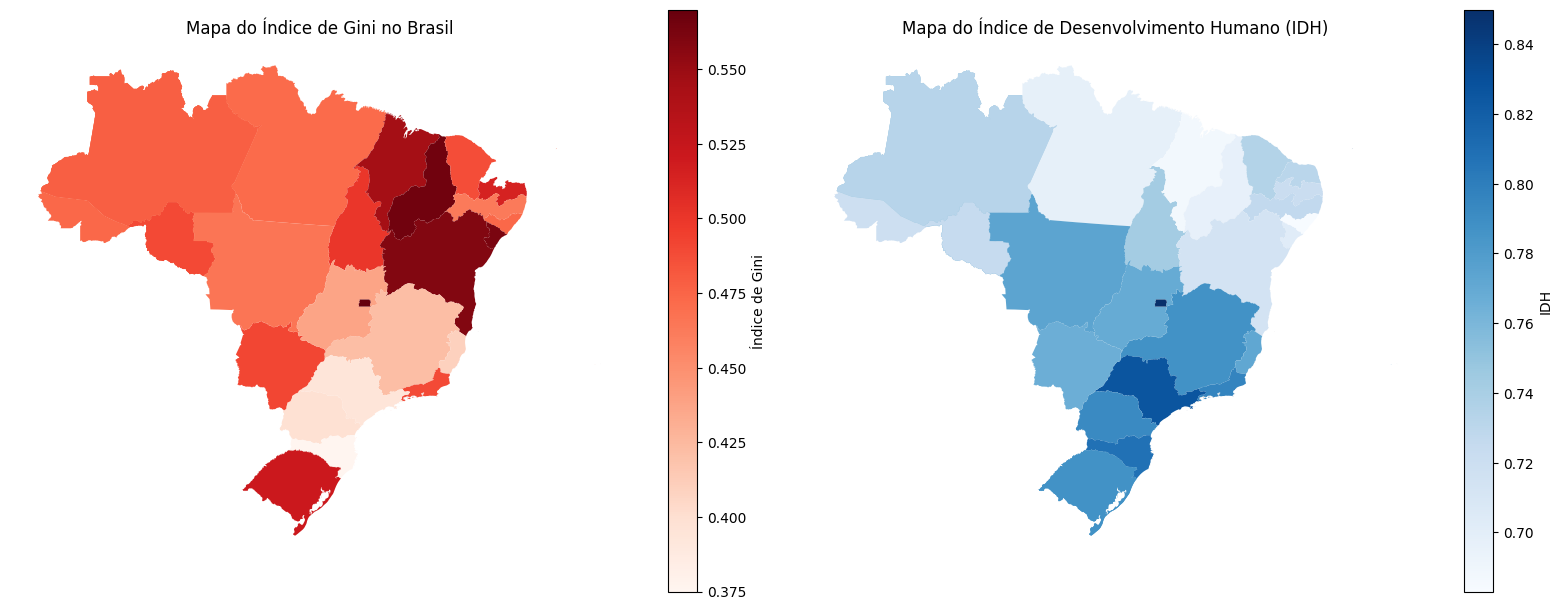

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geobr import read_state

# Carregar shapefile dos estados brasileiros usando geobr
brasil_geo = read_state(year=2020)

# Preparar os dados de GINI e IDH do DataFrame 'df'
# Extrair GINI e a UF correspondente
df_gini = df[['UF', 'GINI']].copy()
df_gini.rename(columns={'UF': 'abbrev_state'}, inplace=True)

# Extrair IDH e a UF correspondente
df_idh = df[['UF.1', 'IDH']].copy()
df_idh.rename(columns={'UF.1': 'abbrev_state'}, inplace=True)

# Unir os dados de GINI e IDH em um único DataFrame por 'abbrev_state'
df_values = pd.merge(df_gini, df_idh, on='abbrev_state', how='outer')

# Juntar o shapefile com os dados de GINI e IDH
mapa_final = pd.merge(brasil_geo, df_values, on='abbrev_state', how='inner')

# Criar figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

# Mapa do Índice de Gini
mapa_final.plot(
    column="GINI", cmap="Reds", legend=True, ax=axs[0],
    legend_kwds={"label": "Índice de Gini", "shrink": 0.6}
)
axs[0].set_title("Mapa do Índice de Gini no Brasil")
axs[0].axis("off")

# Mapa do IDH
mapa_final.plot(
    column="IDH", cmap="Blues", legend=True, ax=axs[1],
    legend_kwds={"label": "IDH", "shrink": 0.6}
)
axs[1].set_title("Mapa do Índice de Desenvolvimento Humano (IDH)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

A análise dos mapas evidencia uma **distribuição geográfica desigual dos indicadores sociais no Brasil**. Os estados com **maior IDH concentram-se nas regiões Sul e Sudeste**, demonstrando melhores condições de vida, educação e renda. Por outro lado, os **menores IDHs estão nas regiões Norte e Nordeste**, revelando desigualdades regionais históricas.

No caso do **Índice de Gini**, observa-se que a **desigualdade de renda é mais acentuada justamente nas regiões com menor IDH**. Isso reforça a correlação entre baixa qualidade de vida e alta desigualdade.

Podemos inferir, portanto, que existe um **padrão regional persistente**: estados com **baixo desenvolvimento humano também sofrem com maior desigualdade**, criando um ciclo difícil de romper. Já os estados mais desenvolvidos tendem a apresentar **maior equidade social**.


# **h) Agrupe as Unidades da Federação em quartis com base nos valores do IDH e compare as distribuições do índice de Gini para cada quartil. Existe alguma tendência observável à medida que o IDH aumenta?**

/tmp/ipython-input-1818130720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quartil_IDH', y='GINI', data=df, palette='Reds')


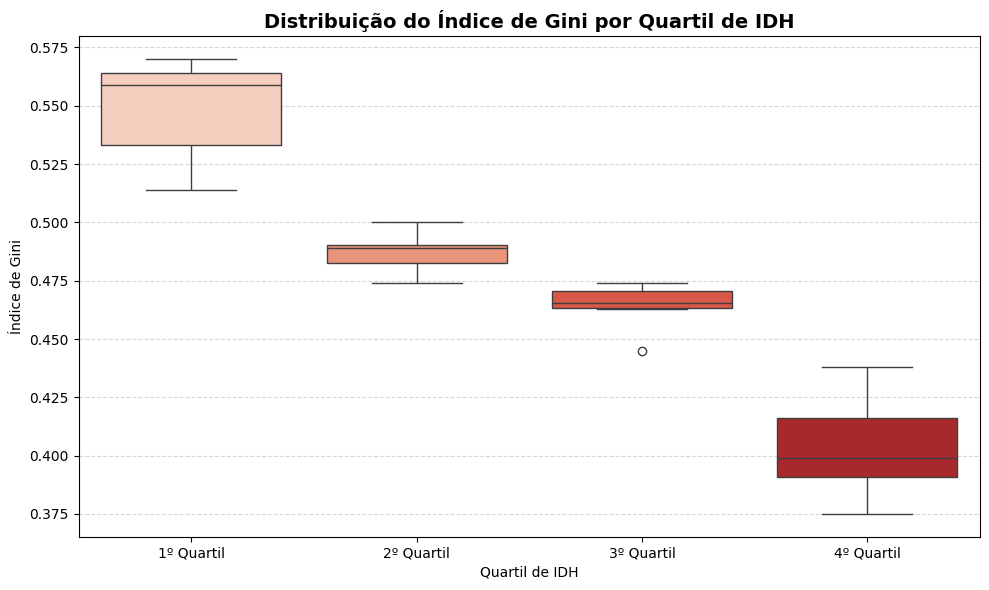

In [50]:
# Criar quartis com base no IDH
df['Quartil_IDH'] = pd.qcut(df['IDH'], q=4, labels=['1º Quartil', '2º Quartil', '3º Quartil', '4º Quartil'])

# Gerar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quartil_IDH', y='GINI', data=df, palette='Reds')
plt.title('Distribuição do Índice de Gini por Quartil de IDH', fontsize=14, fontweight='bold')
plt.xlabel('Quartil de IDH')
plt.ylabel('Índice de Gini')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📊 Análise dos Quartis de IDH e Distribuição do Índice de Gini

Nesta análise, os estados brasileiros foram agrupados em **quartis com base no Índice de Desenvolvimento Humano (IDH)** do ano de 2017. Em seguida, foi analisada a **distribuição do Índice de Gini (2013)** em cada um desses grupos.

---

### 🧠 Interpretação:

A distribuição dos valores de Gini por quartil de IDH revela uma tendência clara:

- **1º Quartil (IDH mais baixo):** Este grupo concentra os estados com menor desenvolvimento humano. Nele, os valores do índice de Gini são, em geral, mais altos, indicando maior desigualdade de renda.
- **2º e 3º Quartis:** Há uma ligeira diminuição na desigualdade, mas ainda se observa certa variação interna. Os valores medianos de Gini já são um pouco menores.
- **4º Quartil (IDH mais alto):** Engloba os estados com maior desenvolvimento. Os valores de Gini neste grupo tendem a ser mais baixos e menos dispersos, sugerindo uma **distribuição de renda mais equitativa**.

---

### 📌 Conclusão:

Existe uma **tendência inversa** entre IDH e Gini:  
À medida que o **IDH aumenta**, o **índice de Gini tende a diminuir**. Isso indica que estados mais desenvolvidos tendem a apresentar **menor desigualdade de renda**, enquanto os menos desenvolvidos enfrentam maiores disparidades sociais e econômicas.

Essa análise reforça a importância de políticas públicas que atuem de forma integrada, promovendo tanto o desenvolvimento humano quanto a redução da desigualdade.

